# 第三题：神经网络：对数几率回归

实验内容：
1. 完成对数几率回归
2. 使用梯度下降求解模型参数
3. 绘制模型损失值的变化曲线
4. 调整学习率和迭代轮数，观察损失值曲线的变化
5. 按照给定的学习率和迭代轮数，初始化新的参数，绘制新模型在训练集和测试集上损失值的变化曲线，完成表格内精度的填写

对数几率回归，二分类问题的分类算法，属于线性模型中的一种，我们可以将其抽象为最简单的神经网络。

<img src="https://davidham3.github.io/blog/2018/09/11/logistic-regression/Fig1.png" ,width=300>

只有一个输入层和一个输出层，还有一个激活函数，$\rm sigmoid$，简记为$\sigma$。  
我们设输入为$X \in \mathbb{R}^{n \times m}$，输入层到输出层的权重为$W \in \mathbb{R}^{m}$，偏置$b \in \mathbb{R}$。

## 激活函数

$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

这个激活函数，会将输出层的神经元的输出值转换为一个 $(0, 1)$ 区间内的数。

因为是二分类问题，我们设类别为0和1，我们将输出值大于0.5的样本分为1类，输出值小于0.5的类分为0类。

## 前向传播

$$
Z = XW + b\\
\hat{y} = \sigma(Z)
$$

其中，$O \in \mathbb{R}^{n}$为输出层的结果，$\sigma$为$\rm sigmoid$激活函数。

**注意：这里我们其实是做了广播，将$b$复制了$n-1$份后拼接成了维数为$n$的向量。**

所以对数几率回归就可以写为：

$$
\hat{y} = \frac{1}{1 + e^{-XW + b}}
$$

## 损失函数

使用对数损失函数，因为对数损失函数较其他损失函数有更好的性质，感兴趣的同学可以去查相关的资料。 

针对二分类问题的对数损失函数：

$$
\mathrm{loss}(y, \hat{y}) = - y \log{\hat{y}} - (1 - y) \log{(1 - \hat{y})}
$$

在这个对数几率回归中，我们的损失函数对所有样本取个平均值：

$$
\mathrm{loss}(y, \hat{y}) = - \frac{1}{n} \sum^n_{i = 1}[y_i \log{\hat{y_i}} + (1 - y_i) \log{(1 - \hat{y_i})}]
$$

**注意，这里我们的提到的$\log$均为$\ln$，在numpy中为**`np.log`。

因为我们的类别只有0和1，所以在这个对数损失函数中，要么前一项为0，要么后一项为0。

如果当前样本的类别为0，那么前一项就为0，损失函数变为 $- \log{(1 - \hat{y})}$ ，因为我们的预测值 $0 < \hat{y} < 1$ ，所以 $0 < 1 - \hat{y} < 1$ ，$- \log{(1 - \hat{y})} > 0$ ，为了降低损失值，模型需要让预测值 $\hat{y}$不断地趋于0。

同理，如果当前样本的类别为1，那么降低损失值就可以使模型的预测值趋于1。

## 参数更新

求得损失函数对参数的偏导数后，我们就可以使用**梯度下降**进行参数更新：

$$
W := W - \alpha \frac{\partial \mathrm{loss}}{\partial W}\\
b := b - \alpha \frac{\partial \mathrm{loss}}{\partial b}
$$

其中，$\alpha$ 是学习率，一般设置为0.1，0.01等。

经过**一定次数**的迭代后，参数会收敛至最优点。这种基于梯度的优化算法很常用，训练神经网络主要使用这类优化算法。

## 反向传播

我们使用梯度下降更新参数$W$和$b$。为此需要求得损失函数对参数$W$和$b$的偏导数，根据链式法则有：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial W} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial W}
\end{aligned}
$$

这里我们一项一项求，先求第一项：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial \hat{y}} = - \frac{1}{n} \sum^n_{i = 1} [\frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}}]
\end{aligned}
$$

第二项：

$$\begin{aligned}
\frac{\partial \hat{y}}{\partial Z} & = \frac{\partial (\frac{1}{1 + e^{-Z}})}{\partial Z}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})^2}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})} \frac{1}{(1 + e^{-Z})}\\
& = \frac{e^{-Z}}{(1 + e^{-Z})} (1 - \frac{e^{-Z}}{(1 + e^{-Z})})\\
& = \sigma(Z)(1 - \sigma(Z))
\end{aligned}
$$

第三项：

$$
\frac{\partial Z}{\partial W} = X^{\mathrm{T}}
$$

综上：

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial W} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial W}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\sigma(Z_i)(1 - \sigma(Z_i))] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\hat{y_i}(1 - \hat{y_i})] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} [y_i(1 - \hat{y_i}) - \hat{y_i}(1 - y_i)] {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - y_i \hat{y_i} - \hat{y_i} + y_i \hat{y_i}) {X_i}^{\mathrm{T}}\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - \hat{y_i}) {X_i}^{\mathrm{T}}\\
&= \frac{1}{n} [X^{\mathrm{T}}(\hat{y} - y)]
\end{aligned}
$$

同理，求$\rm loss$对$b$的偏导数：

**注意，由于$b$是被广播成$n \times K$的矩阵，因此实际上$b$对每个样本的损失都有贡献，因此对其求偏导时，要把$n$个样本对它的偏导数加和。**

$$\begin{aligned}
\frac{\partial \mathrm{loss}}{\partial b} &= \frac{\partial \mathrm{loss}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Z} \frac{\partial Z}{\partial b}\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\sigma(Z_i)(1 - \sigma(Z_i))]\\
&= - \frac{1}{n} \sum^n_{i = 1} [\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}}] [\hat{y_i}(1 - \hat{y_i})]\\
&= - \frac{1}{n} \sum^n_{i = 1} [y_i(1 - \hat{y_i}) - \hat{y_i}(1 - y_i)]\\
&= - \frac{1}{n} \sum^n_{i = 1} (y_i - y_i \hat{y_i} - \hat{y_i} + y_i \hat{y_i})\\
&= \frac{1}{n} \sum^n_{i = 1} (\hat{y_i} - y_i)\\
\end{aligned}$$

这样，我们就得到了损失函数对参数的偏导数，然后就可以使用梯度下降算法更新参数

## 1. 导入数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

我们生成半月形数据

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 2000, noise = 0.3, random_state=0)

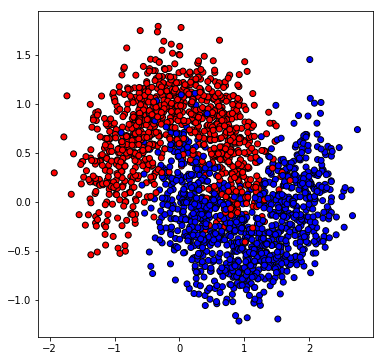

In [3]:
plt.figure(figsize = (6, 6))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cm_bright, edgecolors = 'k')

选择40%的数据作为测试集，60%作为训练集

In [4]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.4, random_state = 32)
trainY = trainY
testY = testY

In [5]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((1200, 2), (1200,), (800, 2), (800,))

## 2. 数据预处理

使用和第一题一样的预处理方式

In [6]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
trainX = s.fit_transform(trainX)
testX = s.transform(testX)

## 3. 定义神经网络

### 3.1 参数初始化

我们需要对神经网络的参数进行初始化，这个网络中只有两个参数，一个$W \in \mathbb{R}^{m}$，一个$b \in \mathbb{R}$。初始化的时候，我们将参数W随机初始化，参数b初始化为0。为什么要对神经网络的参数进行随机初始化，感兴趣的同学可以去查相关的资料。

In [7]:
def initialize(m):
    '''
    初始化参数W和参数b
    
    Returns
    ----------
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    '''
    np.random.seed(32)
    W = np.random.normal(size = (m, )) * 0.01
    b = np.zeros((1, ))
    return W, b

In [8]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
print(Wt.shape) # (2,)
print(bt.shape) # (1,)

(2,)
(1,)


### 3.2 前向传播

接下来我们要定义神经网络前向传播的过程。

首先计算$Z = XW + b$

In [9]:
def linear_combination(X, W, b):
    '''
    完成Z = XW + b的计算
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，输入的数据
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    Returns
    ----------
    Z: np.ndarray, shape = (n, )，线性组合后的值
    
    '''
    
    Z = X.dot(W)+b              # YOUR CODE HERE
    
    return Z

In [10]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
linear_combination(trainX, Wt, bt).shape #(1200,)

(1200,)

接下来实现激活函数$\rm sigmoid$

In [11]:
def my_sigmoid(x):
    '''
    simgoid 1 / (1 + exp(-x))
    
    Parameters
    ----------
    X: np.ndarray, 待激活的值
    
    '''
    # YOUR CODE HERE
    activations = 1/(1+np.exp(-x))
    
    return activations

In [12]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
Zt = linear_combination(trainX, Wt, bt)
my_sigmoid(Zt).mean() # 0.49999

0.49999999939462925

在实现$\rm sigmoid$的时候，可能会遇到上溢(overflow)的问题，可以看到$\rm sigmoid$中有一个指数运算
$$
\mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$
当$x$很大的时候，我们使用`numpy.exp(x)`会直接溢出

In [13]:
np.exp(1e56)

/home/tht/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

In [14]:
my_sigmoid(np.array([-1e56]))

/home/tht/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


array([0.])

虽说程序没有报错，只是抛出了warning，但还是应该解决一下。

解决这种问题的方法有很多，比如，我们可以将$\rm sigmoid$进行变换：

$$\begin{aligned}
\mathrm{sigmoid}(x) &= \frac{1}{1 + e^{-x}}\\
&= \frac{e^x}{1 + e^x}\\
&= \frac{1}{2} + \frac{1}{2} \mathrm{tanh}(\frac{x}{2})
\end{aligned}$$

其中，$\mathrm{tanh}(x) = \frac{\mathrm{sinh}(x)}{\mathrm{cosh}(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

转换成这种形式后，我们就可以直接利用`numpy.tanh`完成$\rm sigmoid$的计算，就不会产生上溢的问题了。

除此以外，最好的解决方法是使用scipy中的`expit`函数，完成$\rm sigmoid$的计算。我们现在做的都是神经网络底层相关的运算，很容易出现数值不稳定性相关的问题，最好的办法就是使用别人已经实现好的函数，这样就能减少我们很多的工作量，同时又快速地完成任务。

In [15]:
from scipy.special import expit

In [16]:
def sigmoid(X):
    return expit(X)

In [17]:
# 测试样例
sigmoid(np.array([-1e56]))

array([0.])

接下来完成整个前向传播的函数，也就是 $Z = XW+b$ 和 $\hat{y} = \mathrm{sigmoid}(Z)$

In [18]:
def forward(X, W, b):
    '''
    完成输入矩阵X到最后激活后的预测值y_pred的计算过程
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    W: np.ndarray, shape = (m, )，权重
    
    b: np.ndarray, shape = (1, )，偏置
    
    Returns
    ----------
    y_pred: np.ndarray, shape = (n, )，模型对每个样本的预测值
    
    '''
    # 求Z
    Z = X.dot(W)+b                          # YOUR CODE HERE
    
    # 求激活后的预测值
    y_pred = sigmoid(Z)                     # YOUR CODE HERE
    
    return y_pred

In [19]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
forward(trainX, Wt, bt).mean() # 0.4999(没有四舍五入)

0.49999999939462925

接下来完成损失函数的编写，我们使用的是对数损失，这里需要注意的一个问题是：

$$
\mathrm{loss}(y, \hat{y}) = - \frac{1}{n}[ y \log{\hat{y}} + (1 - y) \log{(1 - \hat{y})}]
$$

在这个对数损失中，$\hat{y}$中不能有$0$和$1$，如果有$0$，那么损失函数中的前半部分，$\log{0}$就会出错，如果有$1$，那么后半部分$\log{(1-1)}$就会出错。

所以我们要先将$\hat{y}$中的$0$和$1$改变一下，把$0$变成一个比较小但是大于$0$的数，把$1$变成小于$1$但是足够大的数。使用`numpy.clip`函数就可以作到这点。

In [20]:
def logloss(y_true, y_pred):
    '''
    给定真值y，预测值y_hat，计算对数损失并返回
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    Returns
    ----------
    loss: float, 损失值
    
    '''
    # 下面这句话会把y_pred里面小于1e-10的数变成1e-10，大于1 - 1e-10的数变成1 - 1e-10
    y_hat = np.clip(y_pred, 1e-10, 1 - 1e-10)
    
    # 求解对数损失
    loss = -(y_true*np.log(y_hat) + (1-y_true)*np.log(1-y_hat)).mean()                                        # YOUR CODE HERE
    
    return loss

In [21]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
logloss(trainY, forward(trainX, Wt, bt)) # 0.69740

0.6974035295177312

### 3.3 反向传播

我们接下来要完成损失函数对参数的偏导数的计算

In [22]:
def compute_gradient(y_true, y_pred, X):
    '''
    给定预测值y_pred，真值y_true，传入的输入数据X，计算损失函数对参数W的偏导数的导数值dW，以及对b的偏导数的导数值db
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    Returns
    ----------
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    '''    
    # 求损失函数对参数W的偏导数的导数值
    dW = X.T.dot((y_pred-y_true))*1.0/len(y_true)                                          # YOUR CODE HERE
    
    # 求损失函数对参数b的偏导数的导数值
    db = np.sum(y_pred-y_true)*1.0/len(y_true)                                          # YOUR CODE HERE
    
    return dW, db

In [23]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
dWt, dbt = compute_gradient(trainY, forward(trainX, Wt, bt), trainX)
print(dWt.shape) # (2, )
print(dWt.sum()) # 0.04625
print(dbt)       # 0.00999

(2,)
0.046259419816742586
0.009999999394629276


### 3.4 参数更新
给定学习率，结合上一步求出的偏导数，完成梯度下降的更新公式

In [24]:
def update(W, b, dW, db, learning_rate):
    '''
    梯度下降，给定参数W，参数b，以及损失函数对他们的偏导数，使用梯度下降更新参数W和参数b
    
    Parameters
    ----------
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    learning_rate, float，学习率
    
    '''
    # 对参数W进行更新
    W -= learning_rate * dW
    
    # 对参数b进行更新
    # YOUR CODE HERE
    b -= learning_rate * db
    

In [25]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
print(Wt)  # [-0.00348894  0.00983703]
print(bt)  # [ 0.]
print()

dWt, dbt = compute_gradient(trainY, forward(trainX, Wt, bt), trainX)
print(dWt) # [-0.28650366  0.33276308]
print(dbt) # 0.00999999939463
print()

update(Wt, bt, dWt, dbt, 0.01)
print(Wt)  # [-0.00062391  0.0065094 ]
print(bt)  # [ -9.99999939e-05]

[-0.00348894  0.00983703]
[0.]

[-0.28650366  0.33276308]
0.009999999394629276

[-0.00062391  0.0065094 ]
[-9.99999939e-05]


我们来完成整个反向传播和更新参数的函数

In [26]:
def backward(y_true, y_pred, X, W, b, learning_rate):
    '''
    反向传播，包含了计算损失函数对各个参数的偏导数的过程，以及梯度下降更新参数的过程
    
    Parameters
    ----------
    y_true: np.ndarray, shape = (n, ), 真值
    
    y_pred: np.ndarray, shape = (n, )，预测值
    
    X: np.ndarray, shape = (n, m)，数据，一行一个样本，一列一个特征
    
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    dW: np.ndarray, shape = (m, ), 损失函数对参数W的偏导数
    
    db: float, 损失函数对参数b的偏导数
    
    learning_rate, float，学习率
    
    '''
    # 求参数W和参数b的梯度
    dW, db = compute_gradient(y_true, y_pred, X)
    
    # 梯度下降
    update(W, b, dW, db, learning_rate)

In [27]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
y_predt = forward(trainX, Wt, bt)
loss_1 = logloss(trainY, y_predt)
print(loss_1)                             # 0.697403529518

backward(trainY, y_predt, trainX, Wt, bt, 0.01)

y_predt = forward(trainX, Wt, bt)
loss_2 = logloss(trainY, y_predt)
print(loss_2)                             # 0.695477626714

0.6974035295177312
0.6954776267143474


## 4. 训练函数的编写

我们已经实现了完成训练需要的子函数，接下来就是组装了

In [28]:
def train(trainX, trainY, testX, testY, W, b, epochs, learning_rate = 0.01, verbose = False):
    '''
    训练，我们要迭代epochs次，每次迭代的过程中，做一次前向传播和一次反向传播
    同时记录训练集和测试集上的损失值，后面画图用
    
    Parameters
    ----------
    trainX: np.ndarray, shape = (n, m), 训练集
    
    trainY: np.ndarray, shape = (n, ), 训练集标记
    
    testX: np.ndarray, shape = (n_test, m)，测试集
    
    testY: np.ndarray, shape = (n_test, )，测试集的标记
    
    W: np.ndarray, shape = (m, )，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    epochs: int, 要迭代的轮数
    
    learning_rate: float, default 0.01，学习率
    
    verbose: boolean, default False，是否打印损失值
    
    Returns
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    
    training_loss_list = []
    testing_loss_list = []
    
    for i in range(epochs):
        
        # 计算训练集前向传播得到的预测值
        train_y_pred = forward(trainX,W,b)                        # YOUR CODE HERE

        # 计算当前训练集的损失值
        training_loss = logloss(trainY,train_y_pred)                       # YOUR CODE HERE
        
        # 计算测试集前向传播得到的预测值
        test_y_pred = forward(testX,W,b)                         # YOUR CODE HERE
        
        # 计算当前测试集的损失值
        testing_loss = logloss(testY,test_y_pred)                         # YOUR CODE HERE
        
        if verbose == True:
            print('epoch %s, training loss:%s'%(i + 1, training_loss))
            print('epoch %s, testing loss:%s'%(i + 1, testing_loss))
            print()
        
        # 保存损失值
        training_loss_list.append(training_loss)
        testing_loss_list.append(testing_loss)
        
        # 反向传播更新参数
        # YOUR CODE HERE
        backward(trainY,train_y_pred,trainX,W,b,learning_rate)
    
    return training_loss_list, testing_loss_list

In [29]:
# 测试样例
Wt, bt = initialize(trainX.shape[1])
training_loss_list, testing_loss_list = train(trainX, trainY, testX, testY, Wt, bt, 2, 0.1)
print(training_loss_list)  # [0.69740352951773121, 0.67843729060725722]
print(testing_loss_list)   # [0.69743661286103986, 0.67880126235588389]

[0.6974035295177312, 0.6784372906072572]
[0.6974366128610399, 0.6788012623558839]


## 5. 绘制模型损失值变化曲线

In [30]:
def plot_loss_curve(training_loss_list, testing_loss_list):
    '''
    绘制损失值变化曲线
    
    Parameters
    ----------
    training_loss_list: list(float)，每迭代一次之后，训练集上的损失值
    
    testing_loss_list: list(float)，每迭代一次之后，测试集上的损失值
    
    '''
    plt.figure(figsize = (10, 6))
    plt.plot(training_loss_list, label = 'training loss')
    plt.plot(testing_loss_list, label = 'testing loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

## 6. 预测

接下来编写一个预测的函数，事实上，$\rm sigmoid$输出的是当前这个样本为正例的概率，也就是说，这个输出值是一个0到1的值，一般我们将大于0.5的值变成1，小于0.5的值变成0，也就是说，如果当前输出的概率值大于0.5，那我们认为这个样本的类别就是1，否则就是0，这样输出的就是类标了。

In [31]:
def predict(X, W, b):
    '''
    预测，调用forward函数完成神经网络对输入X的计算，然后完成类别的划分，大于0.5的变为1，小于等于0.5的变为0
    
    Parameters
    ----------
    X: np.ndarray, shape = (n, m), 训练集
    
    W: np.ndarray, shape = (m, 1)，参数W
    
    b: np.ndarray, shape = (1, )，参数b
    
    Returns
    ----------
    prediction: np.ndarray, shape = (n, 1)，预测的标记
    
    '''
    
    # YOUR CODE HERE
    res = forward(X,W,b)
    res[res<0.5] = 0
    res[res >= 0.5] = 1
    prediction = res  
    return prediction

In [32]:
# 测试样例
from sklearn.metrics import accuracy_score
Wt, bt = initialize(trainX.shape[1])
predictiont = predict(testX, Wt, bt)
accuracy_score(testY, predictiont)  # 0.16250000000000001

0.1625

## 7. 训练一个神经网络

我们的学习率是0.01，迭代200轮

In [33]:
W, b = initialize(trainX.shape[1])
training_loss_list, testing_loss_list = train(trainX, trainY, testX, testY, W, b, 200, 0.01)

计算测试集精度

In [34]:
prediction = predict(testX, W, b)
accuracy_score(testY, prediction)  # 0.83625000000000005

0.83625

绘制损失值变化曲线

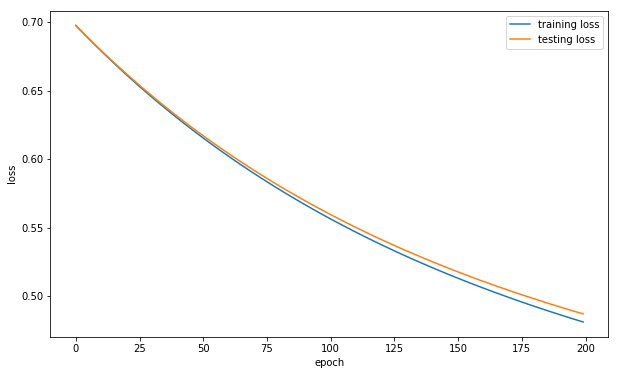

In [35]:
plot_loss_curve(training_loss_list, testing_loss_list)

# test：初始化新的参数，学习率和迭代轮数按下表设置，绘制其训练集和测试集损失值的变化曲线，完成表格内精度的填写

###### 双击此处填写

学习率|迭代轮数|测试集精度
-|-|-
0.0001|200| 0.3325
0.1|1000| 0.84

0.3325


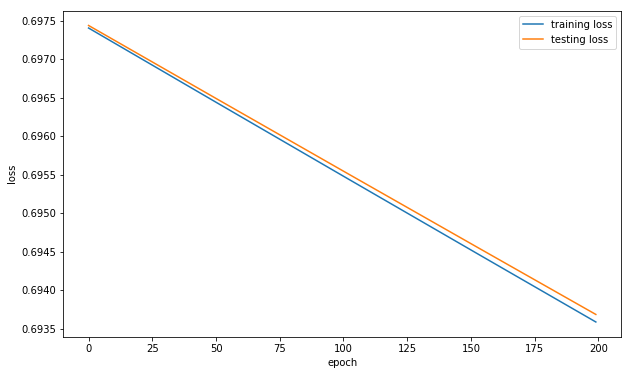

In [36]:
# YOUR CODE HERE
W, b = initialize(trainX.shape[1])
training_loss_list, testing_loss_list = train(trainX, trainY, testX, testY, W, b, 200, 0.0001)

prediction = predict(testX, W, b)
print(accuracy_score(testY, prediction)) 

plot_loss_curve(training_loss_list, testing_loss_list)

0.84


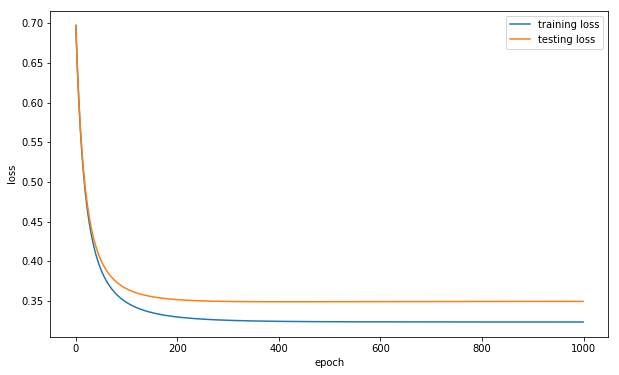

In [37]:
# YOUR CODE HERE
W, b = initialize(trainX.shape[1])
training_loss_list, testing_loss_list = train(trainX, trainY, testX, testY, W, b, 1000, 0.1)

prediction = predict(testX, W, b)
print(accuracy_score(testY, prediction)) 

plot_loss_curve(training_loss_list, testing_loss_list)